In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro

In [2]:
%cd C:\Users\DWAIPAYAN\Desktop\Data Analysis Datasets
df=pd.read_csv('dtdc_data.csv')

C:\Users\DWAIPAYAN\Desktop\Data Analysis Datasets


In [3]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


# Column Description:-

### • data - tells whether the data is testing or training data
### • trip_creation_time – Timestamp of trip creation
### • route_schedule_uuid – Unique Id for a particular route schedule
### • route_type – Transportation type
### • FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
### • Carting: Handling system consisting of small vehicles (carts)
### • trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
### • source_center - Source ID of trip origin
### • source_name - Source Name of trip origin
### • destination_cente – Destination ID
### • destination_name – Destination Name
### • od_start_time – Trip start time
### • od_end_time – Trip end time
### • start_scan_to_end_scan – Time taken to deliver from source to destination
### • is_cutoff – Unknown field
### • cutoff_factor – Unknown field
### • cutoff_timestamp – Unknown field
### • actual_distance_to_destination – Distance in Kms between source and destination warehouse
### • actual_time – Actual time taken to complete the delivery (Cumulative)
### • osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
### • osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
### • factor – Unknown field
### • segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
### • segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
### • segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
### • segment_factor – Unknown field

In [4]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [6]:
df.shape

(144867, 24)

In [7]:
#transforming datetime column to datetime datatype
df['trip_creation_time']=pd.to_datetime(df['trip_creation_time'])
df['od_start_time']=pd.to_datetime(df['od_start_time'])
df['od_end_time']=pd.to_datetime(df['od_end_time'])

In [8]:
# Number of missing values
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [9]:
#Imputation of missing values by mode since the missing value is categorical

from sklearn.impute import SimpleImputer
cat_missing = ['source_name', 'destination_name']
freq_imputer = SimpleImputer(strategy = 'most_frequent')
for col in cat_missing:
    df[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(df[col])))

In [10]:
#Extracting state, city, place of source and destination for analysis

df['source_state']=df['source_name'].str.split('(').str.get(1).str.split(')').str.get(0)
df['destination_state']=df['destination_name'].str.split('(').str.get(1).str.split(')').str.get(0)

df['dest_City'] = df['destination_name'].str.split('(').str.get(0).str.split('_').str.get(0)
df['dest_Place'] = df['destination_name'].str.split('(').str.get(0).str.split('_').str.get(1)

df['source_City'] = df['source_name'].str.split('(').str.get(0).str.split('_').str.get(0)
df['source_Place'] = df['source_name'].str.split('(').str.get(0).str.split('_').str.get(1)

C:\Users\DWAIPAYAN\AppData\Local\Temp\ipykernel_3496\2589627866.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x = 'source_state',y= 'trip_uuid' ,data = source_state,palette="Set2")


Text(0, 0.5, 'Number of trips from source')

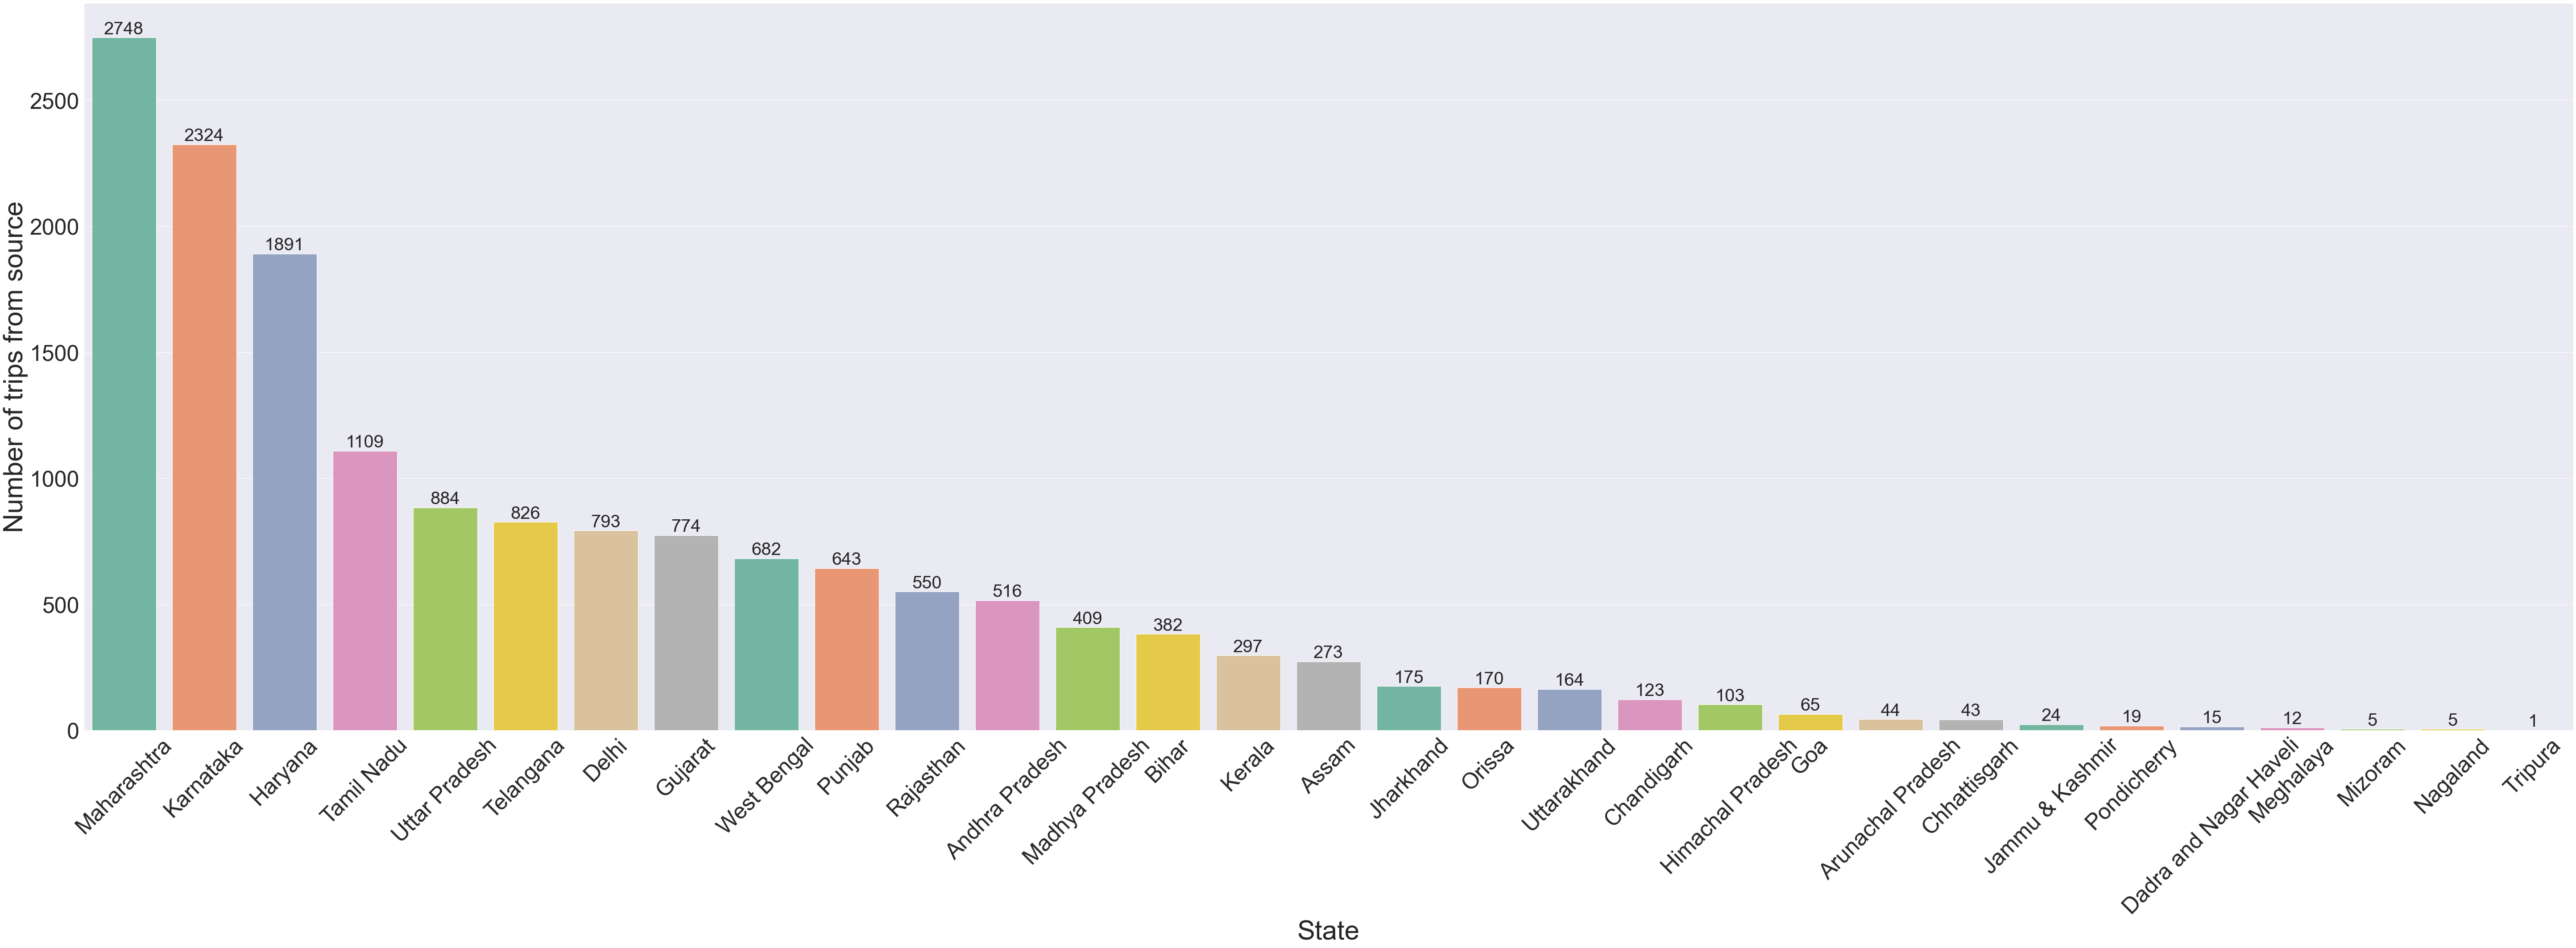

In [16]:
# State wise analysis of source of delivery requests

sns.set(rc={'figure.figsize':(50,5)})
source_state=df.groupby(['source_state'])['trip_uuid'].nunique().sort_values(ascending=False).reset_index()

sns.set(rc={'figure.figsize':(100,30)})
ax=sns.barplot(x = 'source_state',y= 'trip_uuid' ,data = source_state,palette="Set2")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5,f'{height:.0f}', ha='center', va='bottom', fontsize=40)

plt.tick_params(axis='both', labelsize=50)
plt.xticks(rotation=45)
plt.xlabel("State", fontsize=60)
plt.ylabel("Number of trips from source", fontsize=60)

C:\Users\DWAIPAYAN\AppData\Local\Temp\ipykernel_3496\2690967219.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x = 'destination_state',y= 'trip_uuid' ,data = source_state,palette="Set2")


Text(0, 0.5, 'Number of trips to destination')

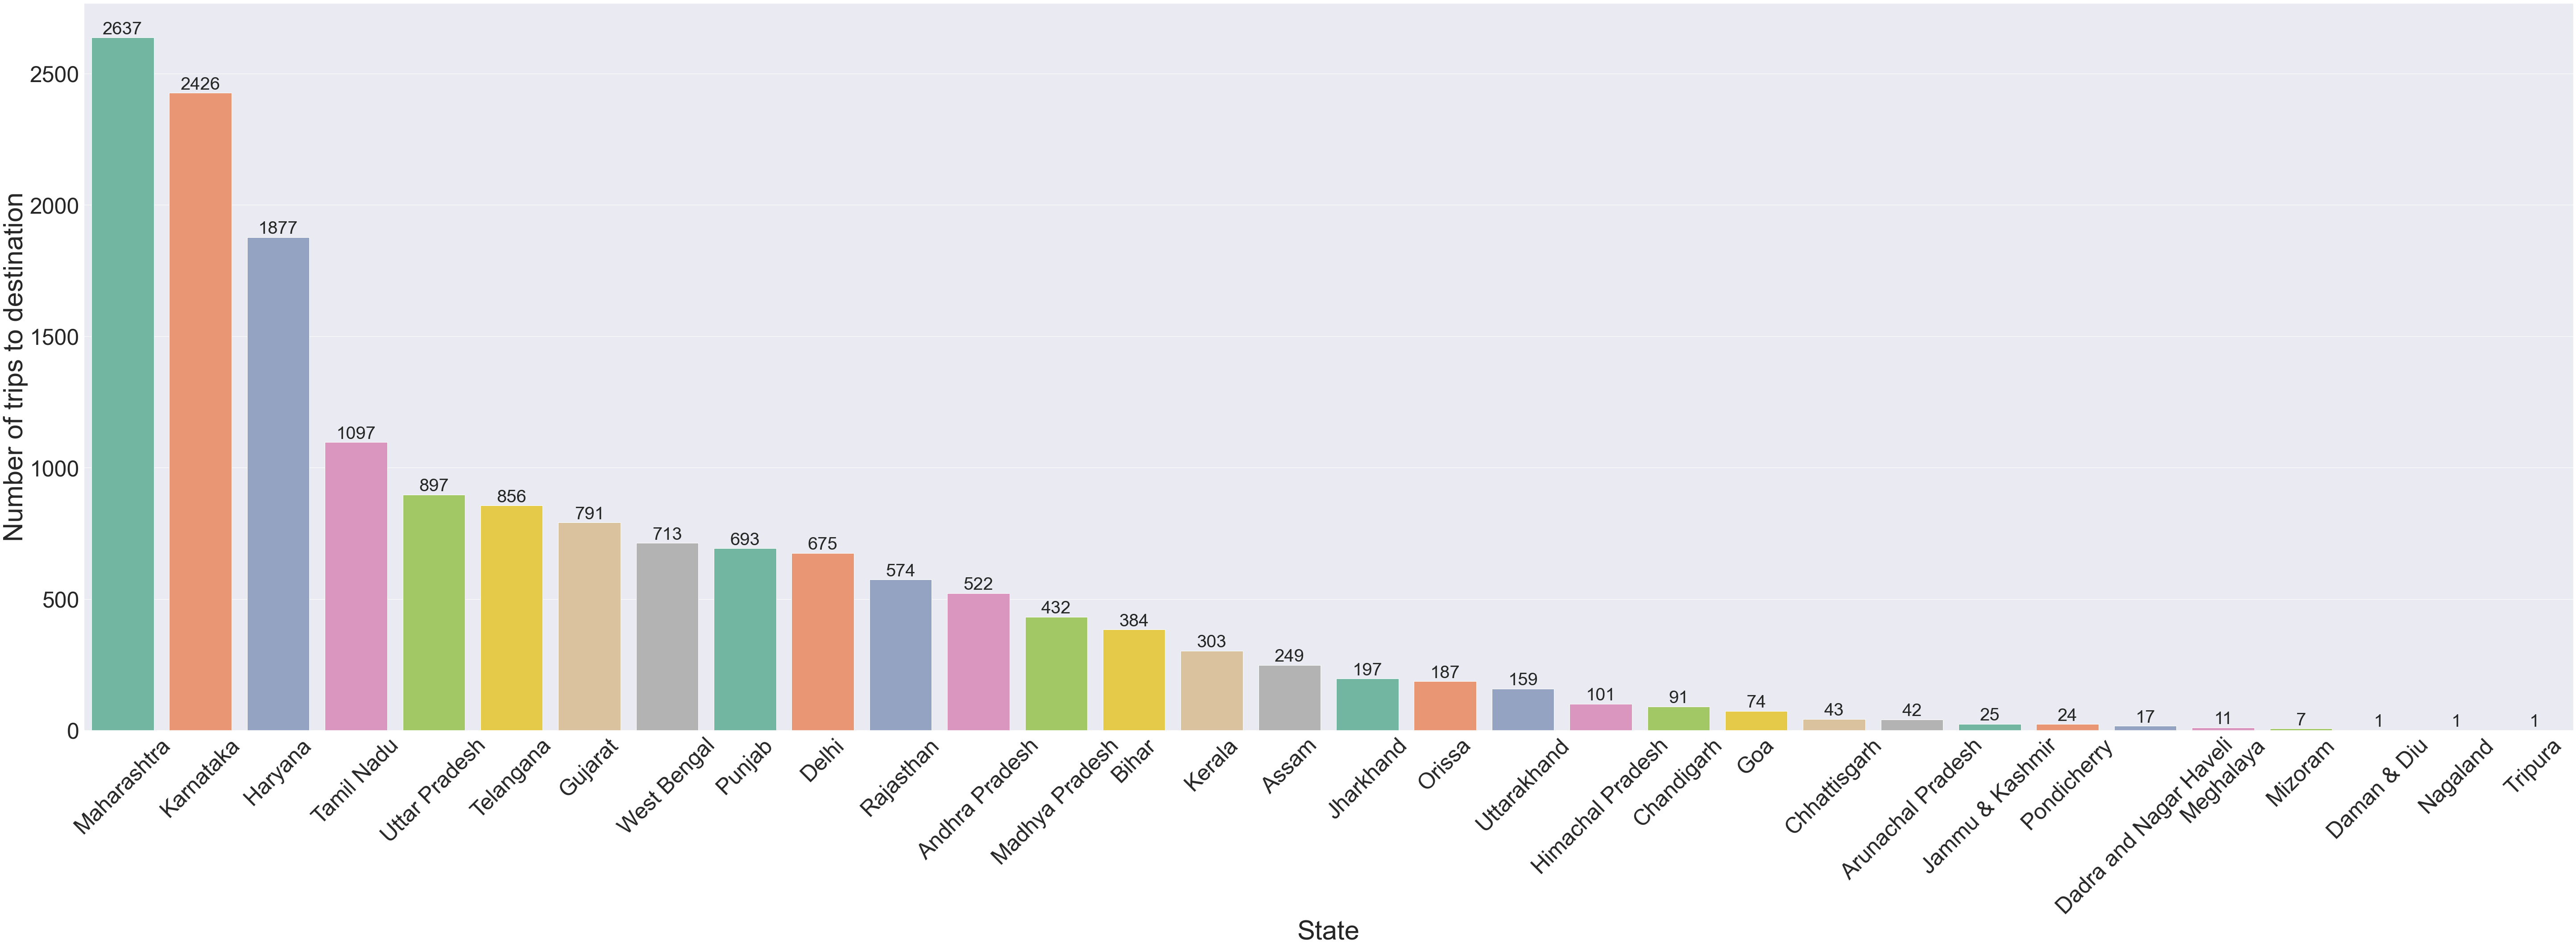

In [18]:
# State wise analysis of destination of delivery requests

sns.set(rc={'figure.figsize':(30,5)})
source_state=df.groupby(['destination_state'])['trip_uuid'].nunique().sort_values(ascending=False).reset_index()

sns.set(rc={'figure.figsize':(100,30)})
ax=sns.barplot(x = 'destination_state',y= 'trip_uuid' ,data = source_state,palette="Set2")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5,f'{height:.0f}', ha='center', va='bottom', fontsize=40)

plt.tick_params(axis='both', labelsize=50)
plt.xticks(rotation=45)
plt.xlabel("State", fontsize=60)
plt.ylabel("Number of trips to destination", fontsize=60)

Text(0.5, 1.0, 'Number of deliveries vs Source_State&Source_place')

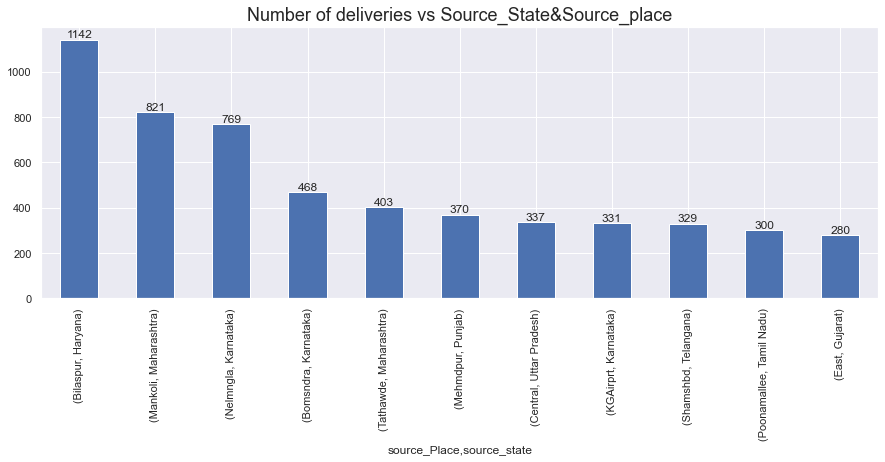

In [127]:
# Number of delivery request based on state and place of request

sns.set(rc={'figure.figsize':(15,5)})
ax=df.groupby(['source_Place','source_state'])['trip_uuid'].nunique().sort_values(ascending=False).head(11).plot(kind='bar')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Number of deliveries vs Source_State&Source_place',fontsize=18)

Text(0.5, 1.0, 'Number of deliveries vs Delivery_State & Delivery_place')

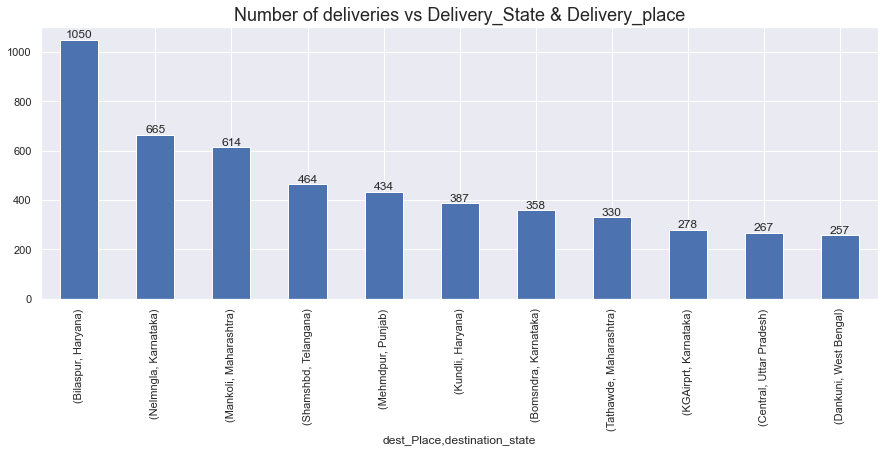

In [138]:
# Number of delivery request based on state and destination place of request

ax=df.groupby(['dest_Place','destination_state'])['trip_uuid'].nunique().sort_values(ascending=False).head(11).plot(kind='bar')

sns.set(rc={'figure.figsize':(15,5)})

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Number of deliveries vs Delivery_State & Delivery_place',fontsize=18)

In [117]:
# Number of delivery request based on state and destination of request

df['dest_City']=df['dest_City'].str.replace('Bengaluru','Bangalore')
df.groupby(['destination_state','dest_City'])['trip_uuid'].nunique().reset_index().nlargest(10,columns='trip_uuid')

,destination_state,dest_City,trip_uuid
362,Karnataka,Bangalore,1804
287,Haryana,Gurgaon,1063
628,Maharashtra,Mumbai,966
973,Telangana,Hyderabad,635
590,Maharashtra,Bhiwandi,614
200,Delhi,Delhi,576
727,Punjab,Chandigarh,434
864,Tamil Nadu,Chennai,414
309,Haryana,Sonipat,390
648,Maharashtra,Pune,388


In [119]:
# Number of delivery request based on state and city of request

df['source_City']=df['source_City'].str.replace('Bengaluru','Bangalore')
df.groupby(['source_state','source_City'])['trip_uuid'].nunique().reset_index().sort_values(by=['trip_uuid','source_state'],ascending=[False,True])


,source_state,source_City,trip_uuid
364,Karnataka,Bangalore,1847
286,Haryana,Gurgaon,1198
593,Maharashtra,Bhiwandi,821
634,Maharashtra,Mumbai,654
202,Delhi,Delhi,620
...,...,...,...
1182,West Bengal,Badkulla,1
1185,West Bengal,Balurghat,1
1197,West Bengal,Chanchal,1
1201,West Bengal,Dalkhola,1


In [158]:
#generating month, year and hour for time series analysis

df['trip_generating_month']=df['trip_creation_time'].dt.month

df['trip_starting_month']=df['od_start_time'].dt.month
df['trip_starting_year']=df['od_start_time'].dt.year
df['trip_starting_hour']=df['od_start_time'].dt.hour
df['trip_starting_day']=df['od_start_time'].dt.day_name()

df['trip_ending_month']=df['od_end_time'].dt.month
df['trip_ending_year']=df['od_end_time'].dt.year
df['trip_ending_hour']=df['od_end_time'].dt.hour
df['trip_ending_day']=df['od_end_time'].dt.day_name()

<AxesSubplot:xlabel='trip_generating_month'>

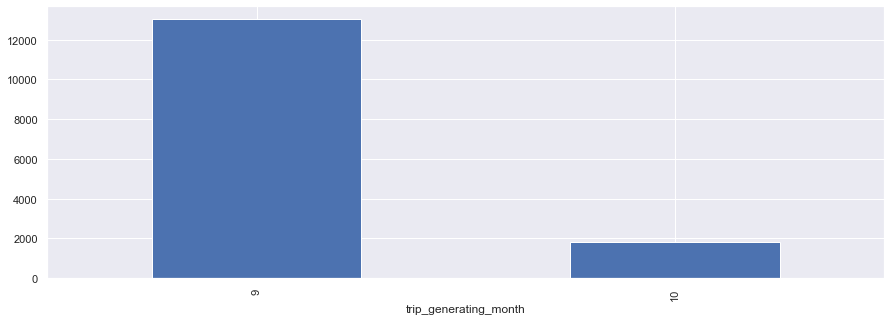

In [200]:
#Monthwise number of trip analysis

df.groupby(['trip_generating_month'])['trip_uuid'].nunique().plot(kind='bar')

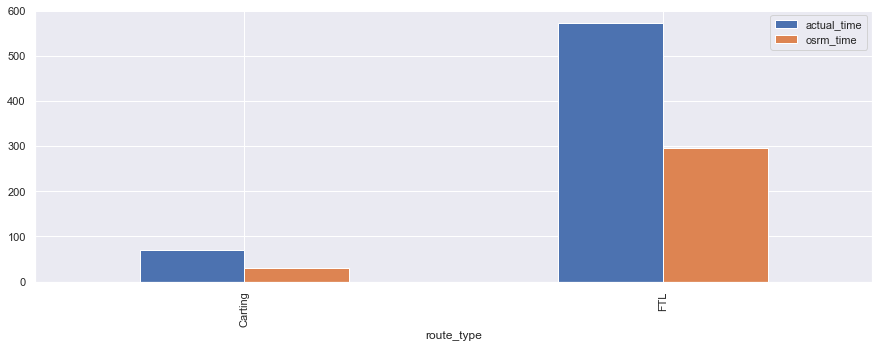

In [199]:
#Route wise delivery time analysis (FTL:Full Truck Load ; Carting:handling system consisting of small vehicles (carts))

df.groupby('route_type').aggregate({'actual_time':'mean','osrm_time':'mean'}).plot(kind='bar')
plt.show()

In [151]:
#Statewise distribution of source center

df.groupby(['source_state'])['source_center'].nunique().sort_values(ascending=False)

source_state
Uttar Pradesh             147
Maharashtra               135
Tamil Nadu                132
Karnataka                 126
West Bengal               103
Rajasthan                  98
Telangana                  84
Gujarat                    81
Andhra Pradesh             78
Madhya Pradesh             65
Bihar                      65
Kerala                     62
Haryana                    58
Assam                      46
Punjab                     45
Orissa                     43
Himachal Pradesh           23
Uttarakhand                23
Delhi                      23
Jharkhand                  21
Arunachal Pradesh          11
Chhattisgarh                8
Goa                         8
Chandigarh                  7
Jammu & Kashmir             5
Mizoram                     3
Meghalaya                   3
Pondicherry                 2
Tripura                     1
Dadra and Nagar Haveli      1
Nagaland                    1
Name: source_center, dtype: int64

In [152]:
#Statewise distribution of destination center

df.groupby(['destination_state'])['destination_center'].nunique().sort_values(ascending=False)

destination_state
Uttar Pradesh             146
Maharashtra               135
Tamil Nadu                125
Karnataka                 125
West Bengal               104
Rajasthan                 100
Gujarat                    79
Telangana                  78
Andhra Pradesh             76
Madhya Pradesh             67
Bihar                      65
Haryana                    61
Kerala                     59
Punjab                     44
Assam                      43
Orissa                     38
Delhi                      27
Himachal Pradesh           21
Jharkhand                  21
Uttarakhand                20
Chhattisgarh                8
Goa                         8
Arunachal Pradesh           8
Chandigarh                  5
Jammu & Kashmir             5
Meghalaya                   3
Mizoram                     3
Pondicherry                 2
Tripura                     2
Nagaland                    1
Dadra and Nagar Haveli      1
Daman & Diu                 1
Name: destination_cent

In [186]:
# Daywise delivery analysis
df1=df.groupby(['trip_ending_day'])['trip_uuid'].nunique().sort_values(ascending=False).to_frame()

[]

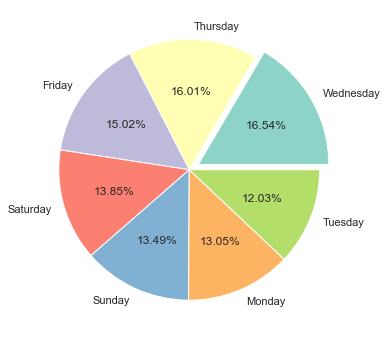

In [198]:
#Pie chart
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set3')
plt.pie(data=df1, x=df1['trip_uuid'], colors=palette_color, labels=['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday','Tuesday'], explode=(0.08,0,0,0,0,0,0), autopct='%0.2f%%')
plt.plot()


In [159]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,source_Place,trip_generating_month,trip_starting_month,trip_starting_year,trip_starting_hour,trip_ending_month,trip_ending_year,trip_ending_hour,trip_starting_day,trip_ending_day
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,VUNagar,9,9,2018,3,9,2018,4,Thursday,Thursday
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,VUNagar,9,9,2018,3,9,2018,4,Thursday,Thursday
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,VUNagar,9,9,2018,3,9,2018,4,Thursday,Thursday
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,VUNagar,9,9,2018,3,9,2018,4,Thursday,Thursday
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,VUNagar,9,9,2018,3,9,2018,4,Thursday,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,Kundli,9,9,2018,16,9,2018,23,Thursday,Thursday
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,Kundli,9,9,2018,16,9,2018,23,Thursday,Thursday
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,Kundli,9,9,2018,16,9,2018,23,Thursday,Thursday
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,Kundli,9,9,2018,16,9,2018,23,Thursday,Thursday


In [161]:
# Calculating the duration of delivery
df['duration_minutes'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 60

In [163]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'source_state', 'destination_state', 'dest_City', 'dest_Place',
       'source_City', 'source_Place', 'trip_generating_month',
       'trip_starting_month', 'trip_starting_year', 'trip_starting_hour',
       'trip_ending_month', 'trip_ending_year', 'trip_ending_hour',
       'trip_starting_day', 'trip_ending_day', 'duration_minutes'],
      dtype='object')

In [179]:
# Statewise difference between actual time taken and osrm time

df1=df.groupby('source_state').agg({'actual_time':'mean','osrm_time':'mean'}).reset_index()
df1=pd.melt(df1, id_vars=['source_state'], value_vars=['actual_time', 'osrm_time'])
df1

,source_state,variable,value
0,Andhra Pradesh,actual_time,142.610760
1,Arunachal Pradesh,actual_time,139.085714
2,Assam,actual_time,781.775652
3,Bihar,actual_time,372.885203
4,Chandigarh,actual_time,49.189349
...,...,...,...
57,Telangana,osrm_time,124.035099
58,Tripura,osrm_time,72.000000
59,Uttar Pradesh,osrm_time,70.908645
60,Uttarakhand,osrm_time,89.470740


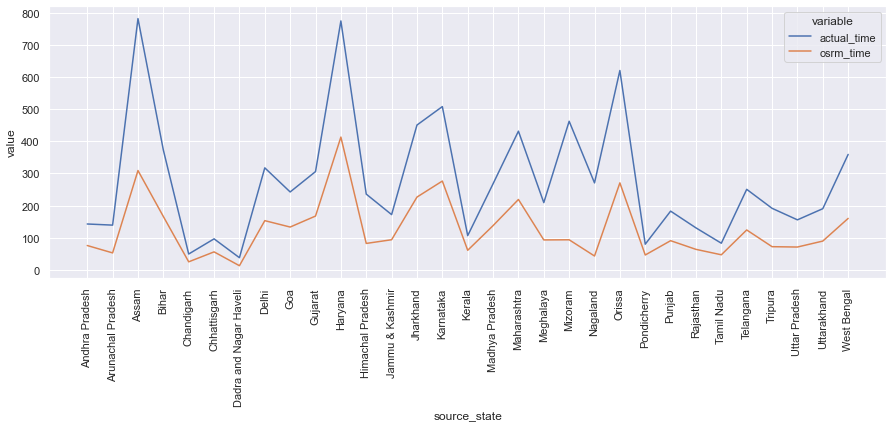

In [181]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df1,x='source_state',y='value',hue='variable')
plt.xticks(rotation=90)
plt.show()

In [182]:
# Statewise difference between actual distance travelled and osrm distance

df1=df.groupby('source_state').agg({'actual_distance_to_destination':'mean','osrm_distance':'mean'}).reset_index()
df1=pd.melt(df1, id_vars=['source_state'], value_vars=['actual_distance_to_destination', 'osrm_distance'])
df1

,source_state,variable,value
0,Andhra Pradesh,actual_distance_to_destination,81.114747
1,Arunachal Pradesh,actual_distance_to_destination,45.982993
2,Assam,actual_distance_to_destination,337.118676
3,Bihar,actual_distance_to_destination,192.910490
4,Chandigarh,actual_distance_to_destination,21.319882
...,...,...,...
57,Telangana,osrm_distance,167.472510
58,Tripura,osrm_distance,101.577660
59,Uttar Pradesh,osrm_distance,89.679691
60,Uttarakhand,osrm_distance,95.041100


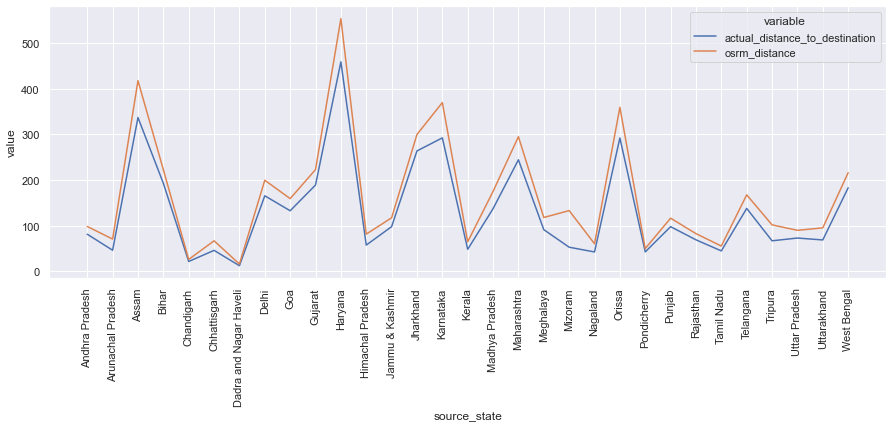

In [183]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df1,x='source_state',y='value',hue='variable')
plt.xticks(rotation=90)
plt.show()

## Hypothesis Testing

In [168]:
df.groupby(['trip_uuid']).agg({'actual_time':'mean','osrm_time':'mean'}).reset_index()

,trip_uuid,actual_time,osrm_time
0,trip-153671041653548748,402.102564,199.666667
1,trip-153671042288605164,44.333333,23.333333
2,trip-153671043369099517,1260.955056,738.966292
3,trip-153671046011330457,41.000000,12.000000
4,trip-153671052974046625,79.428571,29.571429
...,...,...,...
14812,trip-153861095625827784,26.571429,21.142857
14813,trip-153861104386292051,16.500000,9.500000
14814,trip-153861106442901555,91.500000,22.333333
14815,trip-153861115439069069,35.294118,26.235294


#  Test 1 : To check whether average actual time and  open-source routing engine time calculator are equal or not:

### Null Hypothesis(H0) : There is no significant difference in the time taken

### Alternative Hypothesis (H1): There is a significant difference in the time taken

In [174]:
# Null Hypithesis (Ho): Normally distributed vs Alternative Hypothesis (H1): Not Normal
# shapiro wilk test to check the normality of the data in two groups
# shapiro returns t_statistic and p-value
# compare p value  and reject null if p valus <0.05

ntA = shapiro(df['actual_time'])[1] < 0.05
ntB = shapiro(df['osrm_time'])[1] < 0.05
    
if (ntA == False) & (ntB == False):
        
        # Levene Test : To check for equal Variance from two groups
        leveneTest = stats.levene(df['actual_time'],df['osrm_time']) < 0.05
        
        if leveneTest == False:
            # homogenity test 
            # calculates the T-test for the means of two independent samples of scores
            # this test tests that 2 independent samples have identical average(expected) values
            # this test assumes that our samples have equal variances
            ttest = stats.ttest_ind(df['actual_time'],df['osrm_time'],equal_var=True)
        else:
            # if variance is not equal
            ttest = stats.ttest_ind(df['actual_time'],df['osrm_time'],equal_var=False)
    
else:
        # Non Parametric Test when our Assumptions are wrong
         # Its H0: Both group has same distribution means B has distribution as A
        ttest = stats.mannwhitneyu(df['actual_time'],df['osrm_time'])[1]
        
temp = pd.DataFrame({"AB Hypothesis" : [ttest < 0.05]  , "P-Value":[ttest]})
temp["test_type"] = np.where((ntA == False) & (ntB == False),"Parametric","Non Parametric")
temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False,"No sufficient Evidence To Reject NULL Hypothesis","Strong Evidence To Reject NULL Hypothesis")
temp["Comment"] = np.where(temp["AB Hypothesis"] == "No sufficient Evidence To Reject NULL Hypothesis","A/B Groups Are Similar","A/B Groups Are Not Similar")
    
if (ntA == False) & (ntB == False):
        temp["Homogenity"] = np.where(leveneTest==False,"Yes","No")
        temp = temp[["test_type", "Homogeneity","AB Hypothesis", "P-Value", "Comment"]]
else:
        temp = temp[["test_type","AB Hypothesis", "P-Value", "Comment"]]
pd.DataFrame(temp,columns=["test_type","AB Hypothesis", "P-Value", "Comment"])

C:\Users\DWAIPAYAN\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 144867.
  res = hypotest_fun_out(*samples, **kwds)


,test_type,AB Hypothesis,P-Value,Comment
0,Non Parametric,Strong Evidence To Reject NULL Hypothesis,0.0,A/B Groups Are Not Similar


## Test 2 : To check whether average actual time and  segment actual time are equal or not:

### Null Hypothesis(H0) : There is no significant difference in the time taken

### Alternative Hypothesis (H1): There is a significant difference in the time taken

In [175]:
# Null Hypithesis (Ho): Normally distributed vs Alternative Hypothesis (H1): Not Normal
# shapiro wilk test to check the normality of the data in two groups
# shapiro returns t_statistic and p-value
# compare p value  and reject null if p valus <0.05

ntA = shapiro(df['actual_time'])[1] < 0.05
ntB = shapiro(df['segment_actual_time'])[1] < 0.05
    
if (ntA == False) & (ntB == False):
        
        # Levene Test : To check for equal Variance from two groups
        leveneTest = stats.levene(df['actual_time'],df['segment_actual_time']) < 0.05
        
        if leveneTest == False:
            # homogenity test 
            # calculates the T-test for the means of two independent samples of scores
            # this test tests that 2 independent samples have identical average(expected) values
            # this test assumes that our samples have equal variances
            ttest = stats.ttest_ind(df['actual_time'],df['segment_actual_time'],equal_var=True)
        else:
            # if variance is not equal
            ttest = stats.ttest_ind(df['actual_time'],df['segment_actual_time'],equal_var=False)
    
else:
        # Non Parametric Test when our Assumptions are wrong
         # Its H0: Both group has same distribution means B has distribution as A
        ttest = stats.mannwhitneyu(df['actual_time'],df['osrm_time'])[1]
        
temp = pd.DataFrame({"AB Hypothesis" : [ttest < 0.05]  , "P-Value":[ttest]})
temp["test_type"] = np.where((ntA == False) & (ntB == False),"Parametric","Non Parametric")
temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False,"No sufficient Evidence To Reject NULL Hypothesis","Strong Evidence To Reject NULL Hypothesis")
temp["Comment"] = np.where(temp["AB Hypothesis"] == "No sufficient Evidence To Reject NULL Hypothesis","A/B Groups Are Similar","A/B Groups Are Not Similar")
    
if (ntA == False) & (ntB == False):
        temp["Homogenity"] = np.where(leveneTest==False,"Yes","No")
        temp = temp[["test_type", "Homogeneity","AB Hypothesis", "P-Value", "Comment"]]
else:
        temp = temp[["test_type","AB Hypothesis", "P-Value", "Comment"]]
pd.DataFrame(temp,columns=["test_type","AB Hypothesis", "P-Value", "Comment"])

C:\Users\DWAIPAYAN\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 144867.
  res = hypotest_fun_out(*samples, **kwds)


,test_type,AB Hypothesis,P-Value,Comment
0,Non Parametric,Strong Evidence To Reject NULL Hypothesis,0.0,A/B Groups Are Not Similar


#  Test 3 : To check whether  open-source routing engine distance calculator and segment open-source routing engine distance calculator  are equal or not:

### Null Hypothesis(H0) : There is no significant difference in the distance covered

### Alternative Hypothesis (H1): There is a significant difference in the distance covered 

In [176]:
ntA = shapiro(df['osrm_distance'])[1] < 0.05
ntB = shapiro(df['segment_osrm_distance'])[1] < 0.05
    
if (ntA == False) & (ntB == False):
        
        # Levene Test : To check for equal Variance from two groups
        leveneTest = stats.levene(df['osrm_distance'],df['segment_osrm_distance']) < 0.05
        
        if leveneTest == False:
            # homogenity test 
            # calculates the T-test for the means of two independent samples of scores
            # this test tests that 2 independent samples have identical average(expected) values
            # this test assumes that our samples have equal variances
            ttest = stats.ttest_ind(df['osrm_distance'],df['segment_osrm_distance'],equal_var=True)
        else:
            # if variance is not equal
            ttest = stats.ttest_ind(df['osrm_distance'],df['segment_osrm_distance'],equal_var=False)
    
else:
        # Non Parametric Test when our Assumptions are wrong
         # Its H0: Both group has same distribution means B has distribution as A
        ttest = stats.mannwhitneyu(df['osrm_distance'],df['segment_osrm_distance'])[1]
        
temp = pd.DataFrame({"AB Hypothesis" : [ttest < 0.05]  , "P-Value":[ttest]})
temp["test_type"] = np.where((ntA == False) & (ntB == False),"Parametric","Non Parametric")
temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False,"No sufficient Evidence To Reject NULL Hypothesis","Strong Evidence To Reject NULL Hypothesis")
temp["Comment"] = np.where(temp["AB Hypothesis"] == "No sufficient Evidence To Reject NULL Hypothesis","A/B Groups Are Similar","A/B Groups Are Not Similar")
    
if (ntA == False) & (ntB == False):
        temp["Homogenity"] = np.where(leveneTest==False,"Yes","No")
        temp = temp[["test_type", "Homogeneity","AB Hypothesis", "P-Value", "Comment"]]
else:
        temp = temp[["test_type","AB Hypothesis", "P-Value", "Comment"]]
pd.DataFrame(temp,columns=["test_type","AB Hypothesis", "P-Value", "Comment"])

C:\Users\DWAIPAYAN\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 144867.
  res = hypotest_fun_out(*samples, **kwds)


,test_type,AB Hypothesis,P-Value,Comment
0,Non Parametric,Strong Evidence To Reject NULL Hypothesis,0.0,A/B Groups Are Not Similar


#  Test 3 : To check whether  open-source routing engine time calculator and segment open-source routing engine time calculator  are equal or not:

### Null Hypothesis(H0) : There is no significant difference in the time taken

### Alternative Hypothesis (H1): There is a significant difference in the time taken 

In [177]:
ntA = shapiro(df['osrm_time'])[1] < 0.05
ntB = shapiro(df['segment_osrm_time'])[1] < 0.05
    
if (ntA == False) & (ntB == False):
        
        # Levene Test : To check for equal Variance from two groups
        leveneTest = stats.levene(df['osrm_time'],df['segment_osrm_time']) < 0.05
        
        if leveneTest == False:
            # homogenity test 
            # calculates the T-test for the means of two independent samples of scores
            # this test tests that 2 independent samples have identical average(expected) values
            # this test assumes that our samples have equal variances
            ttest = stats.ttest_ind(df['osrm_time'],df['segment_osrm_time'],equal_var=True)
        else:
            # if variance is not equal
            ttest = stats.ttest_ind(df['osrm_time'],df['segment_osrm_time'],equal_var=False)
    
else:
        # Non Parametric Test when our Assumptions are wrong
         # Its H0: Both group has same distribution means B has distribution as A
        ttest = stats.mannwhitneyu(df['osrm_time'],df['segment_osrm_time'])[1]
        
temp = pd.DataFrame({"AB Hypothesis" : [ttest < 0.05]  , "P-Value":[ttest]})
temp["test_type"] = np.where((ntA == False) & (ntB == False),"Parametric","Non Parametric")
temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False,"No sufficient Evidence To Reject NULL Hypothesis","Strong Evidence To Reject NULL Hypothesis")
temp["Comment"] = np.where(temp["AB Hypothesis"] == "No sufficient Evidence To Reject NULL Hypothesis","A/B Groups Are Similar","A/B Groups Are Not Similar")
    
if (ntA == False) & (ntB == False):
        temp["Homogenity"] = np.where(leveneTest==False,"Yes","No")
        temp = temp[["test_type", "Homogeneity","AB Hypothesis", "P-Value", "Comment"]]
else:
        temp = temp[["test_type","AB Hypothesis", "P-Value", "Comment"]]
pd.DataFrame(temp,columns=["test_type","AB Hypothesis", "P-Value", "Comment"])

C:\Users\DWAIPAYAN\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 144867.
  res = hypotest_fun_out(*samples, **kwds)


,test_type,AB Hypothesis,P-Value,Comment
0,Non Parametric,Strong Evidence To Reject NULL Hypothesis,0.0,A/B Groups Are Not Similar
